In [71]:
import pandas as pd
import random as r
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [64]:
df = pd.read_csv('data.csv')
df = df.drop('CustomerID', axis = 1)
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [65]:
def MFConverter(df,c,cidx):
    for i in range(0,len(df)):
        if df.iloc[i,cidx] == 'Male':
            df.iloc[i,cidx] = '1'
        else:
            df.iloc[i,cidx] = '0'
    df[c] = pd.to_numeric(df[c])
    return df

def MinMaxScaling(df):
    columns = df.columns
    idx = -1
    for col in columns:
        idx += 1
        MIN = df[col].min()
        MAX = df[col].max()
        for i in range(0,len(df)):
            df.iloc[i,idx] = (df.iloc[i,idx] - MIN) / (MAX - MIN)
    return df

In [66]:
data = MinMaxScaling(MFConverter(df,'Gender',0))
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.019231,0.000000,0.387755
1,1,0.057692,0.000000,0.816327
2,0,0.038462,0.008197,0.051020
3,0,0.096154,0.008197,0.775510
4,0,0.250000,0.016393,0.397959
5,0,0.076923,0.016393,0.765306
6,0,0.326923,0.024590,0.051020
7,0,0.096154,0.024590,0.948980
8,1,0.884615,0.032787,0.020408
9,0,0.230769,0.032787,0.724490


###K-Means Clustering (From Scratch Implementation)

In [67]:
def KMC_centroids(df,clusters):
    #Initial Random Point Selection
    InitialIdx = r.sample(range(0,len(df)), clusters)
    Centroid = []
    for idx in InitialIdx:
        Centroid.append(df.iloc[idx].tolist())
    features = len(Centroid[0])

    #Initial Class is null or -1
    Class = {}
    for i in range(0,len(df)):
        Class[i] = -1

    #Running KMC until it's converged
    while(True):
        #Variable to check if previous and current iteration are same
        Converged = 0

        #Checking Euclidean Distance per point to cluster
        for i in range(0,len(df)):
            point = df.iloc[i].tolist()
            minDist = None
            bestCentroid = None
            for c in range(0,clusters):
                Dist = 0
                for f in range(0,features):
                    Dist += (point[f] - Centroid[c][f])**2
                if (minDist == None) or (minDist > Dist):
                    minDist = Dist
                    bestCentroid = c
                    minDist = Dist
            if Class[i] == bestCentroid:
                Converged += 1
            Class[i] = bestCentroid

        #If last iteration is same as current then stop
        if Converged == len(df):
            break

        #New centroid is mean of all points whithin cluster
        for c in range(0,clusters):
            newCentroid = [0 for z in range(0,features)]
            class_points = 0
            for idx in range(0,len(df)):
                if Class[idx] == c:
                    class_points += 1
                    point = df.iloc[idx].tolist()
                    for f in range(0,features):
                        newCentroid[f] += point[f]
            for f in range(0, features):
                newCentroid[f] = newCentroid[f] / class_points
            Centroid[c] = newCentroid

    #WCSS Calculation
    WCSS = 0
    for i in range(0,len(df)):
        point = df.iloc[i].tolist()
        belongCluster = Centroid[Class[i]]
        for f in range(0,features):
            WCSS += (point[f] - belongCluster[f])**2
    return Centroid, WCSS

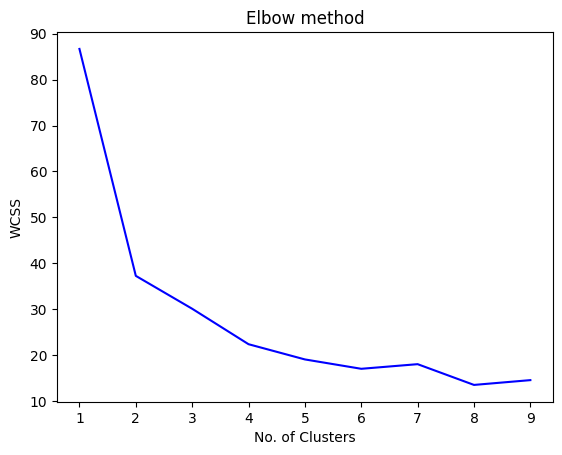

In [85]:
c = []
w = []
for clusters in range(1, 10):
    c.append(clusters)
    cent, wcss = KMC_centroids(data,clusters)
    w.append(wcss)
plt.plot(c,w,color='blue')
plt.title('Elbow method')
plt.ylabel("WCSS")
plt.xlabel("No. of Clusters")
plt.show()

###K-Means Clustering (Using sklearn)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

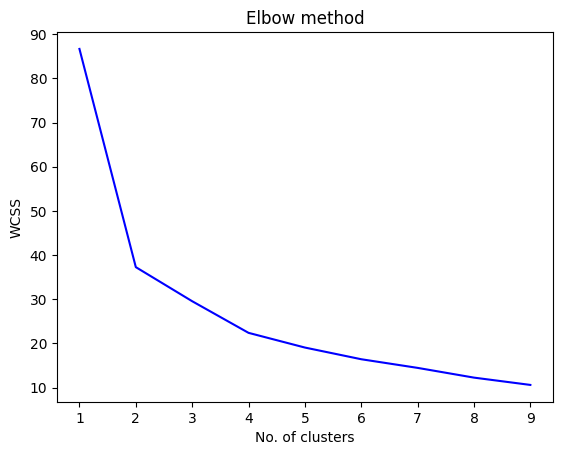

In [74]:
xSKL = []
wSKL = []

for clusters in range(1,10):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(data)
    xSKL.append(clusters)
    wSKL.append(kmeans.inertia_)

plt.plot(xSKL,wSKL,color='blue')
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

From implmenting both I conclude that we need 4 clusters as beyond 4 clusters the algorithm stabilizes and the error is almost the same for both. The difference is beyond 6 clusters in the graph the impelemtation of K-Means from Scratch has a difference as error goes up and it could be mainly due to selection of starting initial points for clusters but till 4 clusters both have same WCSS (or) Inertial values.

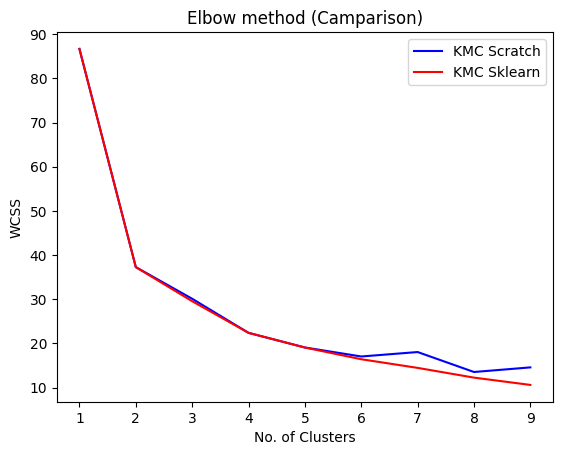

In [88]:
plt.plot(c,w,color='blue')
plt.plot(xSKL,wSKL,color='red')
plt.title('Elbow method (Camparison)')
plt.ylabel("WCSS")
plt.xlabel("No. of Clusters")
plt.legend(['KMC Scratch','KMC Sklearn'])
plt.show()